## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [2]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("bangalore_temparature.tsv", sep='\t')
data.shape
data.info()
data.index = data.Year
del data['Year']
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
Year    102 non-null int64
Jan     102 non-null float64
Feb     102 non-null float64
Mar     102 non-null float64
Apr     102 non-null float64
May     102 non-null float64
Jun     102 non-null float64
Jul     102 non-null float64
Aug     102 non-null float64
Sep     102 non-null float64
Oct     102 non-null float64
Nov     102 non-null float64
Dec     102 non-null float64
dtypes: float64(12), int64(1)
memory usage: 10.4 KB


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,22.122088,24.028069,26.375049,27.844608,27.108118,24.923186,23.985824,24.125373,24.347304,24.100167,22.882186,21.759961
std,0.617820,0.732336,0.656179,0.558630,0.636558,0.547904,0.485182,0.373501,0.520555,0.458388,0.581238,0.554744
min,20.699000,22.145000,24.791000,26.725000,25.378000,23.621000,22.770000,23.090000,23.189000,22.838000,21.693000,20.648000
25%,21.768250,23.502250,25.965000,27.452000,26.691500,24.601000,23.620000,23.856000,23.977500,23.827000,22.438250,21.313000
50%,22.187000,24.074000,26.462500,27.899000,27.231000,24.932500,24.022500,24.080500,24.351000,24.149500,22.934500,21.826500
75%,22.476750,24.534000,26.748500,28.213750,27.579250,25.250750,24.293500,24.430250,24.685500,24.354000,23.234000,22.114250
max,23.530000,26.134000,28.048000,29.068000,28.272000,26.427000,25.190000,25.019000,25.869000,25.413000,24.478000,23.124000


### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

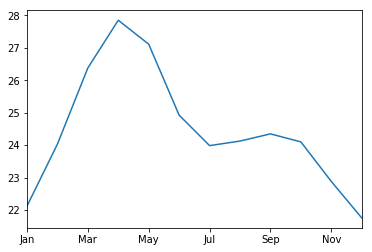

In [16]:
data.mean().plot()

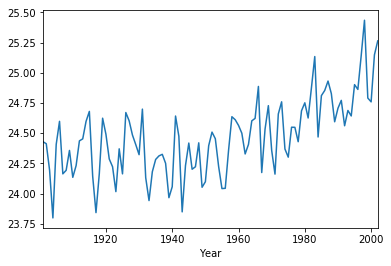

In [24]:
# transposed plot such that the months are now the rows, and the years are the columns
data_by_year = data.T
data_by_year.mean().plot()

In [32]:
# got the index by finding the spot where the 1960 column == the max in 1960, and then getting the index of that
data_by_year[data_by_year[1960] == data_by_year[1960].max()].index

Index(['Apr'], dtype='object')

In [33]:
data_by_year[data_by_year[1960] == data_by_year[1960].min()].index

Index(['Dec'], dtype='object')

In [35]:
# uses aggregate functions on the column of interest
hi = data_by_year[1960].max()
lo = data_by_year[1960].min()
mn = data_by_year[1960].mean()
print("Highest: {}\nLowest: {}\nMean: {}".format(hi, lo, mn))

Highest: 28.142
Lowest: 21.814
Mean: 24.564083333333333


In [38]:
def year_statistics(year):
    # takes the year in int or string form, finds the min max and mean of the temperatures of that year
    year = int(year)
    hi = data_by_year[year].max()
    lo = data_by_year[year].min()
    mn = data_by_year[year].mean()
    return print("Highest: {}\nLowest: {}\nMean: {}".format(hi, lo, mn))

year_statistics(1955)

Highest: 27.486
Lowest: 20.699
Mean: 24.041083333333333


In [58]:
diff_list = []
# iterates over each month in the dataset, and subtracts the max value from the min value to find the gain
for month in data:
    diff_list.append(data[month].max() - data[month].min())

#finds the index of the biggest and smallest gains
max_index = diff_list.index(max(diff_list))
min_index = diff_list.index(min(diff_list))

# uses the biggest and smallest indexes and returns the columns that correspond with those indices
print("Highest difference: {} "
      "\n Lowest difference: {}".format(data.columns[max_index], data.columns[min_index]))

Highest difference: Feb 
 Lowest difference: Aug


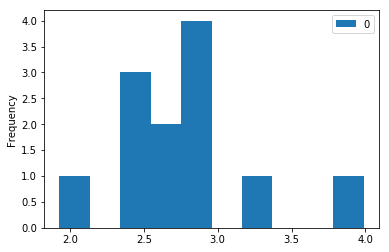

In [65]:
diff_list = pd.DataFrame(diff_list).set_index(data.columns)
diff_list.plot(kind='hist')

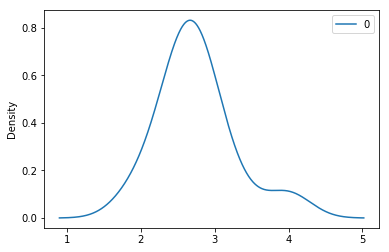

In [66]:
diff_list.plot(kind='kde')

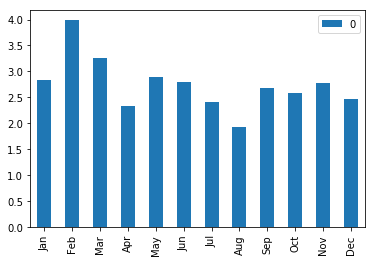

In [67]:
diff_list.plot(kind='bar')

### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

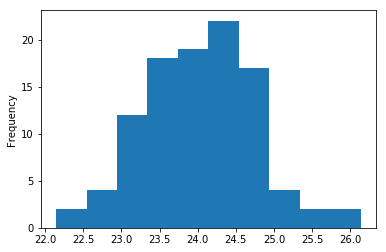

In [68]:
data['Feb'].plot(kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c650160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c687ba8>], dtype=object)

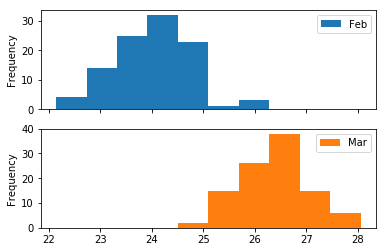

In [69]:
data[['Feb','Mar']].plot(kind='hist', subplots=True)

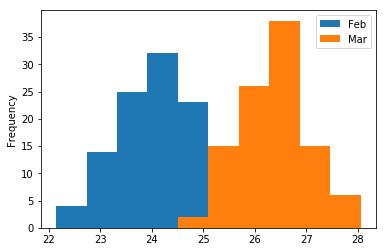

In [70]:
data[['Feb','Mar']].plot(kind='hist')

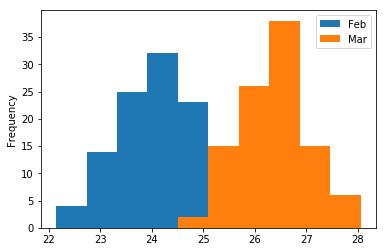

In [71]:
def hist_compare(month1, month2):
    data[[month1, month2]].plot(kind='hist')
hist_compare("Feb", "Mar")

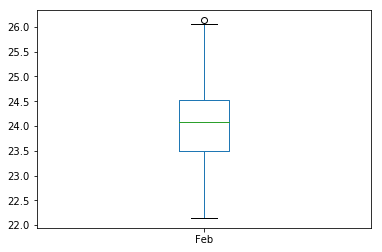

In [72]:
data['Feb'].plot(kind='box')

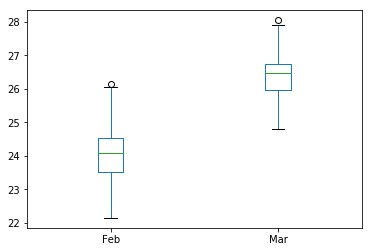

In [73]:
data[['Feb', 'Mar']].plot(kind='box')

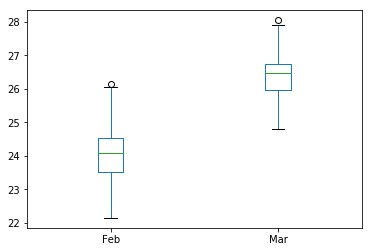

In [74]:
def box_compare(month1, month2):
    data[[month1, month2]].plot(kind='box')
    
box_compare("Feb", "Mar")

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


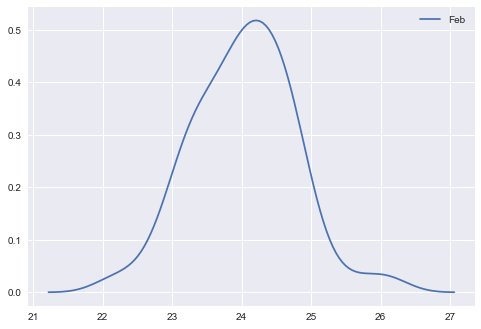

In [79]:
import seaborn as sns
sns.kdeplot(data['Feb'])

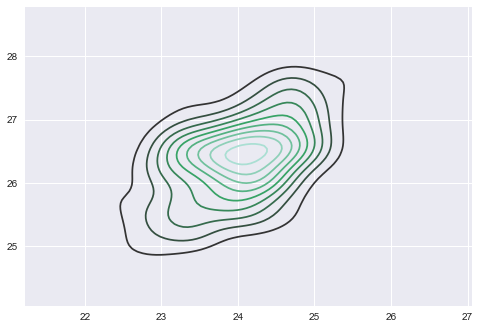

In [80]:
def kde_compare(month1, month2):
    sns.kdeplot(data[[month1, month2]])
kde_compare('Feb', 'Mar')

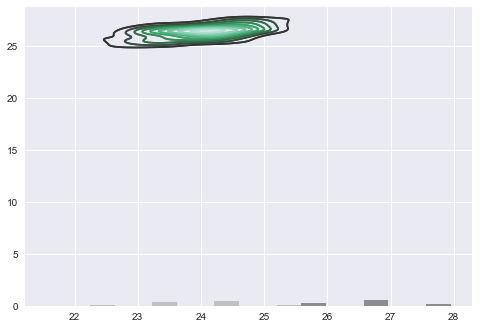

In [89]:
sns.distplot(data[['Feb', 'Mar']], color=["gray", 'black'])
sns.kdeplot(data[['Feb', 'Mar']], color=['blue', 'green'])

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


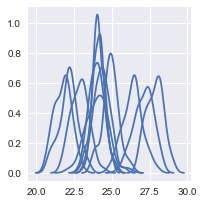

In [142]:
# basically mapping the kde plot over the facetgrid grid. I guess they appear on the same plot because their axes don't differ?
g = sns.FacetGrid(data['Feb'])
for column in data:
    g = g.map(sns.kdeplot, data=data[column])

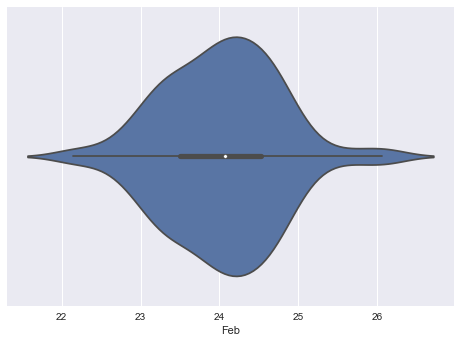

In [103]:
sns.violinplot(data['Feb'])

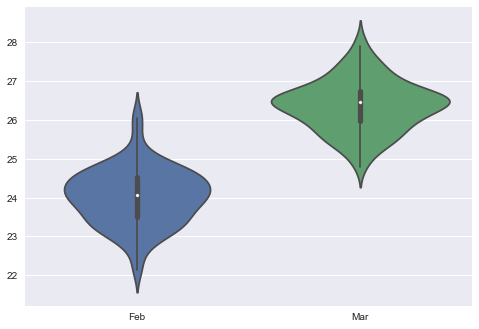

In [105]:
sns.violinplot(data=data[['Feb', 'Mar']])

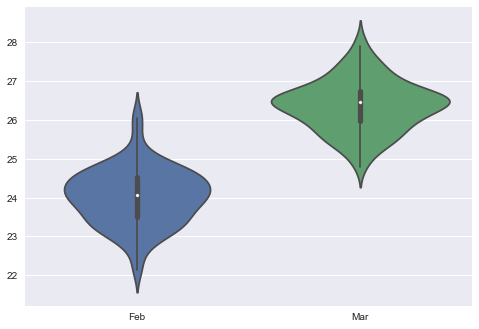

In [106]:
def violin_compare(month1, month2):
    sns.violinplot(data=data[[month1, month2]])
violin_compare('Feb', 'Mar')

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.

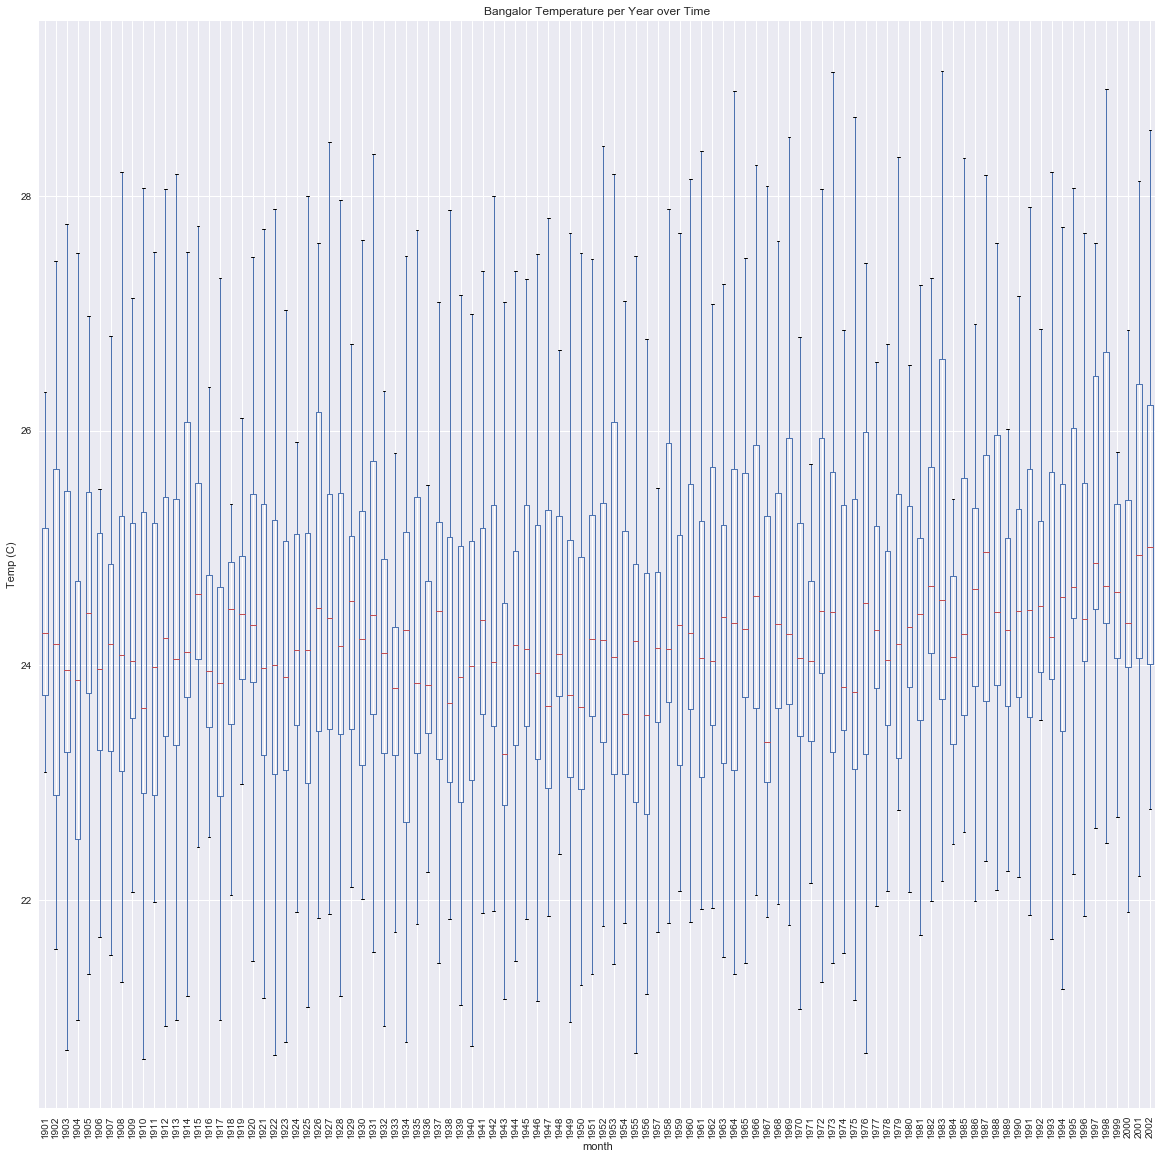

In [165]:
plt.title("Bangalor Temperature per Year over Time")
plt.ylabel("Temp (C)")
plt.xlabel("Year")
# boxplot, bigger plot with x label rotation
data_by_year.boxplot(figsize=[20,20], rot=90)


In [114]:
data["May"].min()

25.378

In [115]:
data["May"].max()

28.271999999999998